In [1]:
!pip install hmmlearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from hmmlearn import hmm 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
df = pd.read_pickle("EUR_USD_D.pkl")
df = df.drop(['volume', 'mid_o','mid_h', 'mid_l', 'mid_c','bid_o','bid_h','bid_l','bid_c' ], 1)

/tmp/ipykernel_28647/225217238.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['volume', 'mid_o','mid_h', 'mid_l', 'mid_c','bid_o','bid_h','bid_l','bid_c' ], 1)


In [4]:
non_cols = ["time", "volume"]

# convert all prices to numbers from strings 
mod_cols = [x for x in df.columns if x not in non_cols]
df[mod_cols] = df[mod_cols].apply(pd.to_numeric)

In [5]:
df.time = df.time.str[:-20]
df['time']  = pd.to_datetime(df['time']) 

In [6]:
df.set_index('time', inplace=True)

In [7]:
df

,ask_o,ask_h,ask_l,ask_c
time,,,,
2008-02-09,1.45110,1.45315,1.45095,1.45225
2008-02-10,1.45225,1.45778,1.44823,1.45188
2008-02-11,1.45193,1.46154,1.44967,1.45848
2008-02-12,1.45848,1.46000,1.45322,1.45738
2008-02-13,1.45738,1.46475,1.45488,1.46433
...,...,...,...,...
2021-11-01,1.16077,1.16143,1.15759,1.15808
2021-11-02,1.15809,1.16173,1.15631,1.16127
2021-11-03,1.16149,1.16194,1.15289,1.15557


In [8]:
returns = np.log(df['ask_c']).diff()

In [9]:
returns.dropna(inplace=True)

<AxesSubplot: >

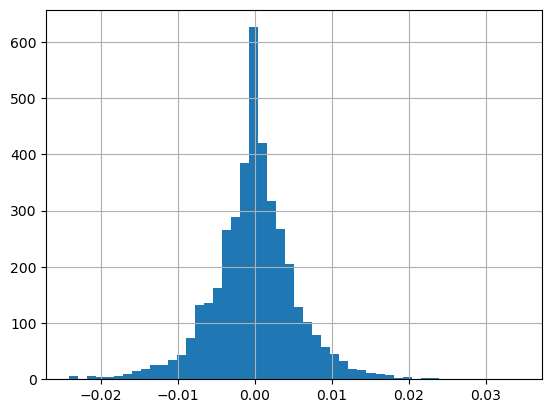

In [10]:
returns.hist(bins=50)

In [11]:
model = hmm.GaussianHMM(n_components=2, covariance_type='diag') 

In [12]:
X = returns.to_numpy().reshape(-1,1)
model.fit(X)

GaussianHMM(n_components=2)

In [13]:
Z = model.predict(X)

In [14]:
Z

array([0, 0, 0, ..., 0, 0, 0])

/tmp/ipykernel_28647/2112793201.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


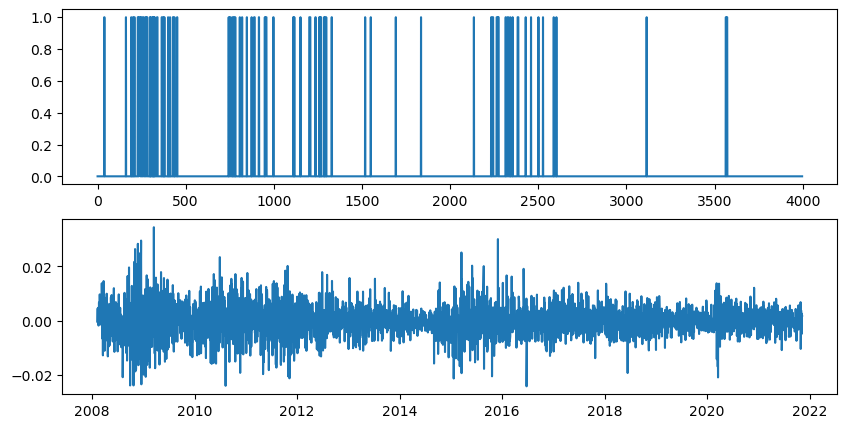

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns)

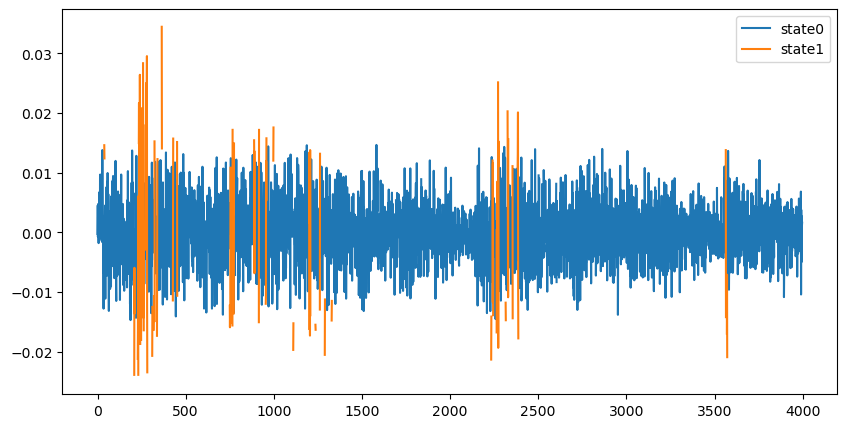

In [16]:
fig, ax = plt.subplots(figsize=(10,5))


returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan


returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state0')
plt.plot(returns1, label='state1')
plt.legend()

In [17]:
model.transmat_


array([[0.94220372, 0.05779628],
       [0.58004215, 0.41995785]])

In [18]:
model.transmat_ = np.array([
    [0.999, 0.001],
    [0.0001, 0.9999],
])

In [19]:
Z = model.predict(X)

/tmp/ipykernel_28647/2112793201.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


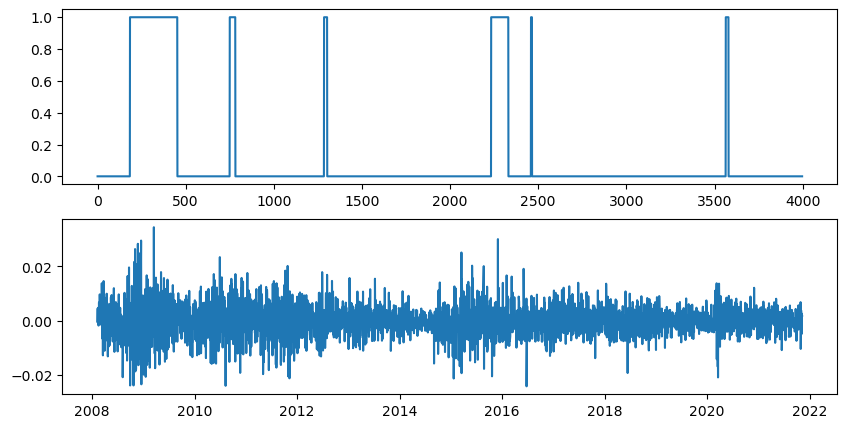

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns)

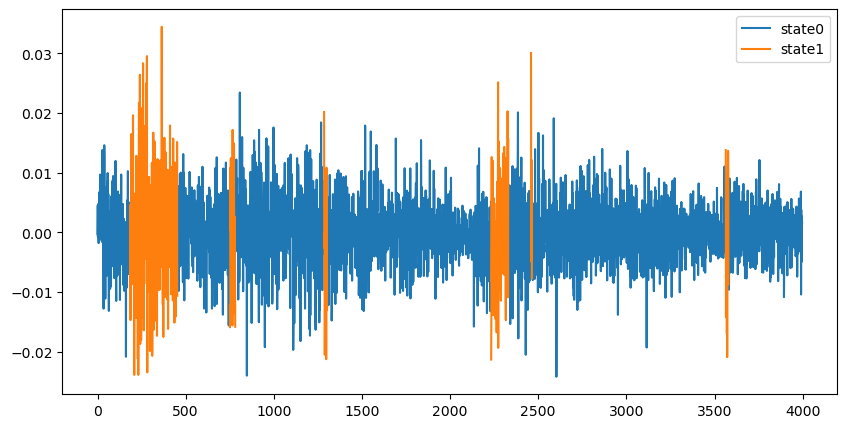

In [21]:
fig, ax = plt.subplots(figsize=(10,5))


returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan


returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state0')
plt.plot(returns1, label='state1')
plt.legend()